In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from data_analysis.event_detection import *
import numpy as np
from utils.plot_utils import plot_mean_std_fill

import warnings
warnings.filterwarnings('ignore')

## Gait comparison (Python/CPP/Winter)

In [2]:
WINTER_PATH="../../data/winter_data/"
win_df_data=pd.read_csv(WINTER_PATH+"data_normal.csv")
win_df_std=pd.read_csv(WINTER_PATH+"std_normal.csv")

RAW_REFERENCE_PATH="../../data/raw_reference.csv"

DIR_REF_CPP="../../data/ref_cpp/"

df=pd.read_csv(open(RAW_REFERENCE_PATH))

sub_hip=df.filter(like="hip",axis=1)
df[sub_hip.columns]=-df[sub_hip.columns]

contact=pd.read_csv(DIR_REF_CPP+"footfall1",sep=" ")
joints=pd.read_csv(DIR_REF_CPP+"joints_angle1",sep=" ")

repmax: Index(['stride17'], dtype='object')


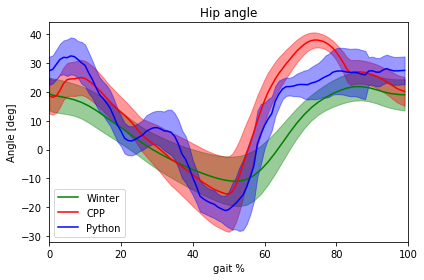

In [3]:
what="hip"

#WINTER NORMAL
mean_win=interp_gaitprcent(win_df_data[what],100)
std_win=interp_gaitprcent(win_df_std[what],100)
ax=plot_mean_std_fill(mean_win,std_win,'g')
# CPP MODEL
metric='HIP_RIGHT'
rep,var=get_rep_var_from_contact(contact,metric,joints)
plot_mean_std_fill(-rep*180/np.pi,var*180/np.pi,'r',ax)

# PYTHON MODEL
mean_exp,std_exp=get_mean_std_stride(df,"angles_"+what+"_r",interp=True,stride_choice="repmax")
plot_mean_std_fill(mean_exp*180/np.pi,std_exp*180/np.pi,'b',ax)

plt.title("Hip angle")
plt.xlabel("gait %")
plt.ylabel("Angle [deg]")
plt.legend(["Winter","CPP","Python"])
plt.xlim([0,100])
plt.tight_layout()
plt.savefig("hip_cmp.png",dpi=300)

repmax: Index(['stride17'], dtype='object')


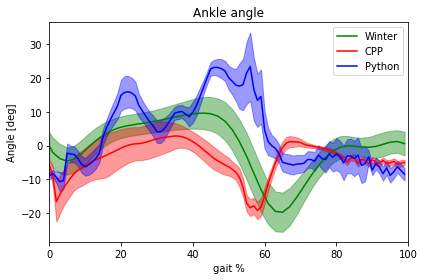

In [4]:
what="ankle"


#WINTER NORMAL
mean_win=interp_gaitprcent(win_df_data[what],100)
std_win=interp_gaitprcent(win_df_std[what],100)
ax=plot_mean_std_fill(mean_win,std_win,'g')
# CPP MODEL
metric='ANKLE_RIGHT'
rep,var=get_rep_var_from_contact(contact,metric,joints)
plot_mean_std_fill(-rep*180/np.pi,var*180/np.pi,'r',ax)

# PYTHON MODEL
mean_exp,std_exp=get_mean_std_stride(df,"angles_"+what+"_r",interp=True,stride_choice="repmax")
plot_mean_std_fill(mean_exp*180/np.pi,std_exp*180/np.pi,'b',ax)

plt.title("Ankle angle")
plt.xlabel("gait %")
plt.ylabel("Angle [deg]")
plt.legend(["Winter","CPP","Python"])
plt.xlim([0,100])
plt.tight_layout()
plt.savefig("ankle_cmp.png",dpi=300)

repmax: Index(['stride5'], dtype='object')


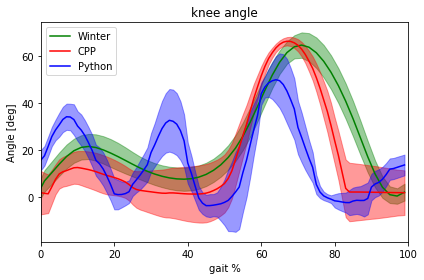

In [5]:
what="knee"


#WINTER NORMAL
mean_win=interp_gaitprcent(win_df_data[what],100)
std_win=interp_gaitprcent(win_df_std[what],100)
ax=plot_mean_std_fill(mean_win,std_win,'g')
# CPP MODEL
metric='KNEE_RIGHT'
rep,var=get_rep_var_from_contact(contact,metric,joints)
plot_mean_std_fill(rep*180/np.pi,var*180/np.pi,'r',ax)

# PYTHON MODEL
mean_exp,std_exp=get_mean_std_stride(df,"angles_"+what+"_r",interp=True,stride_choice="repmax")
plot_mean_std_fill(mean_exp*180/np.pi,std_exp*180/np.pi,'b',ax)

plt.title("knee angle")
plt.xlabel("gait %")
plt.ylabel("Angle [deg]")
plt.legend(["Winter","CPP","Python"])
plt.xlim([0,100])
plt.tight_layout()
plt.savefig("knee_cmp.png",dpi=300)

# Comparison with Open loop cpp

## Muscle activation

In [6]:
RAW_REFERENCE_PATH="../../data/raw_reference.csv"
OPEN_LOOP_CPP_PATH="../../data/openloop_cpp/openLoopPythonCheck/"

df=pd.read_csv(open(RAW_REFERENCE_PATH))
sub_hip=df.filter(like="hip",axis=1)

df[sub_hip.columns]=-df[sub_hip.columns]

ol_df=pd.read_csv(OPEN_LOOP_CPP_PATH+"muscles_activity1.csv")
fy=df.filter(like="Fy",axis=1) # adds fy field from python df to be able to split
ol_df[fy.columns]=fy
ol_df.head()

,left_gas,left_glu,left_hab,left_had,left_ham,left_hf,left_sol,left_ta,left_vas,right_gas,right_glu,right_hab,right_had,right_ham,right_hf,right_sol,right_ta,right_vas,LGRF_GRFy,RGRF_GRFy
0,0.010000,0.01,0.01,0.01,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.01,0.01,0.010000,0.010000,0.010000,0.010000,0.010000,-1.539135e-236,-1.539135e-236
1,0.011882,0.01,0.01,0.01,0.014452,0.077237,0.010946,0.017640,0.015884,0.011882,0.010079,0.01,0.01,0.014452,0.010791,0.010946,0.017640,0.015884,2.390637e-224,2.390637e-224
2,0.013585,0.01,0.01,0.01,0.018478,0.138046,0.011803,0.024550,0.021204,0.013585,0.010151,0.01,0.01,0.018478,0.011507,0.011803,0.024550,0.021204,-1.336543e-225,-1.336543e-225
3,0.015124,0.01,0.01,0.01,0.022120,0.193040,0.012577,0.030798,0.026017,0.015124,0.010216,0.01,0.01,0.022120,0.012154,0.012577,0.030798,0.026017,-4.249568e-224,-4.249568e-224
4,0.016516,0.01,0.01,0.01,0.025413,0.242775,0.013277,0.036450,0.030369,0.016516,0.010275,0.01,0.01,0.025413,0.012739,0.013277,0.036450,0.030369,-1.970791e-224,-1.970791e-224


In [7]:
# Check some strides timestamps if needed
spl,timestamps=split_stride(df,add_strike_lift(df),'act_bifemlh_l',with_timestamps=True)
#timestamps

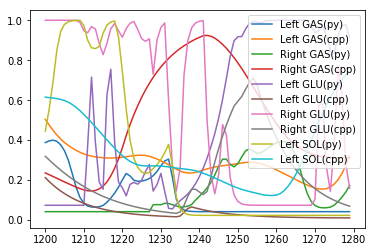

In [8]:
CPP_COLS=['left_gas', 'left_glu', 'left_hab', 'left_had', 'left_ham', 'left_hf',
       'left_sol', 'left_ta', 'left_vas', 'right_gas', 'right_glu',
       'right_hab', 'right_had', 'right_ham', 'right_hf', 'right_sol',
       'right_ta', 'right_vas']
PY_COLS=['act_bifemlh_l', 'act_bifemlh_r', 'act_glut_max_l', 'act_glut_max_r',
       'act_med_gas_l', 'act_med_gas_r', 'act_psoas_l', 'act_psoas_r',
       'act_soleus_l', 'act_soleus_r', 'act_tib_ant_l', 'act_tib_ant_r',
       'act_vas_int_l', 'act_vas_int_r']
MAP_COLS={'Left GAS':('act_med_gas_l','left_gas'),
          'Right GAS':('act_med_gas_r','right_gas'),
        'Left GLU':('act_glut_max_l','left_glu'),
         'Right GLU':('act_glut_max_r','right_glu'),
         'Left SOL':('act_soleus_l','left_sol')}
#samp=[1200:1280]
for short_key,map_keys in MAP_COLS.items():
    key_py,key_cpp=map_keys
    if (df[key_py]==ol_df[key_cpp]).all():
        print("Same vals for",key_cpp)
    else:
        plt.plot(df[key_py][1200:1280],label=short_key+'(py)')
        plt.plot(ol_df[key_cpp][1200:1280],label=short_key+'(cpp)')
        plt.legend()
#plt.plot(act[1200:1280])

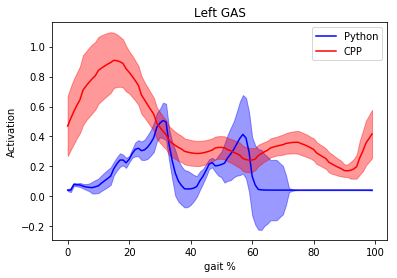

In [9]:
what='Left GAS'
py_key,cpp_key=MAP_COLS[what]

mean_exp,std_exp=get_mean_std_stride(df,py_key,interp=True,stride_choice="stride20")
ax=plot_mean_std_fill(mean_exp,std_exp,'b')

mean_exp,std_exp=get_mean_std_stride(ol_df,cpp_key,interp=True,stride_choice="stride20")
plot_mean_std_fill(mean_exp,std_exp,'r',ax)



plt.title(what)
plt.xlabel("gait %")
plt.ylabel("Activation")
plt.legend(["Python","CPP"]);

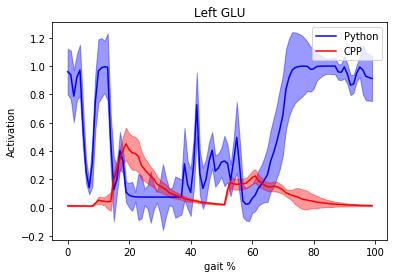

In [10]:
what='Left GLU'
py_key,cpp_key=MAP_COLS[what]

mean_exp,std_exp=get_mean_std_stride(df,py_key,interp=True,stride_choice="stride20")
ax=plot_mean_std_fill(mean_exp,std_exp,'b')

mean_exp,std_exp=get_mean_std_stride(ol_df,cpp_key,interp=True,stride_choice="stride20")
plot_mean_std_fill(mean_exp,std_exp,'r',ax)



plt.title(what)
plt.xlabel("gait %")
plt.ylabel("Activation")
plt.legend(["Python","CPP"]);

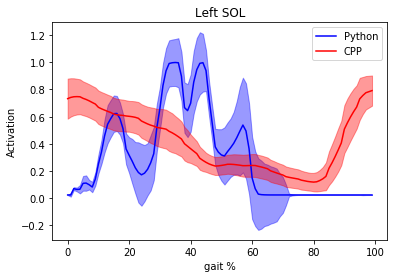

In [11]:
what='Left SOL'
py_key,cpp_key=MAP_COLS[what]

mean_exp,std_exp=get_mean_std_stride(df,py_key,interp=True,stride_choice="stride20")
ax=plot_mean_std_fill(mean_exp,std_exp,'b')

mean_exp,std_exp=get_mean_std_stride(ol_df,cpp_key,interp=True,stride_choice="stride20")
plot_mean_std_fill(mean_exp,std_exp,'r',ax)



plt.title(what)
plt.xlabel("gait %")
plt.ylabel("Activation")
plt.legend(["Python","CPP"]);

## Torques

In [12]:
RAW_REFERENCE_PATH="../../data/raw_reference.csv"
OPEN_LOOP_CPP_PATH="../../data/openloop_cpp/openLoopPythonCheck/"

df=pd.read_csv(open(RAW_REFERENCE_PATH))
sub_hip=df.filter(like="hip",axis=1)
df[sub_hip.columns]=-df[sub_hip.columns]

ol_df=pd.read_csv(OPEN_LOOP_CPP_PATH+"joints_force1.csv")
fy=df.filter(like="Fy",axis=1) # adds fy field from python df to be able to split
ol_df[fy.columns]=fy
ol_df.columns

Index(['TORQUE_HIP_LEFT', 'TORQUE_HIPCOR_LEFT', 'TORQUE_KNEE_LEFT',
       'TORQUE_ANKLE_LEFT', 'TORQUE_HIP_RIGHT', 'TORQUE_HIPCOR_RIGHT',
       'TORQUE_KNEE_RIGHT', 'TORQUE_ANKLE_RIGHT', 'LGRF_GRFy', 'RGRF_GRFy'],
      dtype='object')

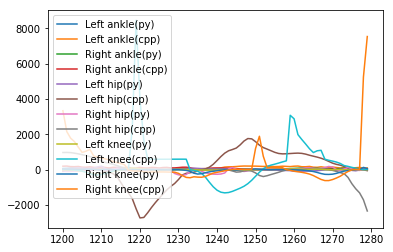

In [13]:
PY_COLS=['moments_ankle_l', 'moments_ankle_r', 'moments_hip_l', 'moments_hip_r',
       'moments_knee_l', 'moments_knee_r']
CPP_COLS=['TORQUE_HIP_LEFT', 'TORQUE_HIPCOR_LEFT', 'TORQUE_KNEE_LEFT',
       'TORQUE_ANKLE_LEFT', 'TORQUE_HIP_RIGHT', 'TORQUE_HIPCOR_RIGHT',
       'TORQUE_KNEE_RIGHT', 'TORQUE_ANKLE_RIGHT']
MAP_COLS={'Left ankle':('moments_ankle_l','TORQUE_ANKLE_LEFT'),
          'Right ankle':('moments_ankle_r','TORQUE_ANKLE_RIGHT'),
          'Left hip': ('moments_hip_l','TORQUE_HIP_LEFT'),
          'Right hip': ('moments_hip_r','TORQUE_HIP_RIGHT'),
          'Left knee':('moments_knee_l','TORQUE_KNEE_LEFT'),
          'Right knee':('moments_knee_r','TORQUE_KNEE_RIGHT')}

for short_key,map_keys in MAP_COLS.items():
    key_py,key_cpp=map_keys
    if (df[key_py]==ol_df[key_cpp]).all():
        print("Same vals for",key_cpp)
    else:
        plt.plot(df[key_py][1200:1280],label=short_key+'(py)')
        plt.plot(ol_df[key_cpp][1200:1280],label=short_key+'(cpp)')
        plt.legend()

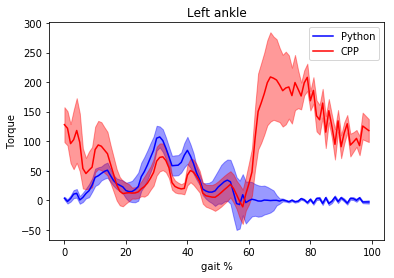

In [14]:
what='Left ankle'
py_key,cpp_key=MAP_COLS[what]

mean_exp,std_exp=get_mean_std_stride(df,py_key,interp=True,stride_choice="repmax")
ax=plot_mean_std_fill(mean_exp,std_exp,'b')

mean_exp,std_exp=get_mean_std_stride(ol_df,cpp_key,interp=True,stride_choice="repmax")
plot_mean_std_fill(mean_exp,std_exp,'r',ax)
plt.title(what)
plt.xlabel("gait %")
plt.ylabel("Torque")
plt.legend(["Python","CPP"]);

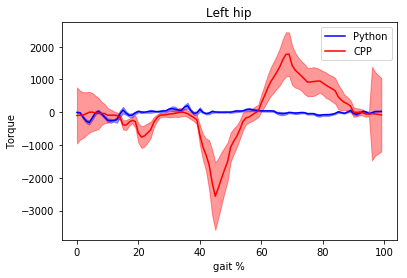

In [15]:
what='Left hip'
py_key,cpp_key=MAP_COLS[what]

mean_exp,std_exp=get_mean_std_stride(df,py_key,interp=True,stride_choice="repmax")
ax=plot_mean_std_fill(mean_exp,std_exp,'b')

mean_exp,std_exp=get_mean_std_stride(ol_df,cpp_key,interp=True,stride_choice="repmax")
plot_mean_std_fill(mean_exp,std_exp,'r',ax)
plt.title(what)
plt.xlabel("gait %")
plt.ylabel("Torque")
plt.legend(["Python","CPP"]);

- Looks like python ankle has no torque during swing ?? -> should it ?
- WHAAAT ? (10 oom in hip/knee torques) -> 

## Muscle force

In [16]:
RAW_REFERENCE_PATH="../../data/raw_reference.csv"
OPEN_LOOP_CPP_PATH="../../data/openloop_cpp/openLoopPythonCheck/"

df=pd.read_csv(open(RAW_REFERENCE_PATH))
sub_hip=df.filter(like="hip",axis=1)
df[sub_hip.columns]=-df[sub_hip.columns]

ol_df=pd.read_csv(OPEN_LOOP_CPP_PATH+"muscles_force1.csv")
fy=df.filter(like="Fy",axis=1) # adds fy field from python df to be able to split
ol_df[fy.columns]=fy
ol_df.columns

Index(['left_gas', 'left_glu', 'left_hab', 'left_had', 'left_ham', 'left_hf',
       'left_sol', 'left_ta', 'left_vas', 'right_gas', 'right_glu',
       'right_hab', 'right_had', 'right_ham', 'right_hf', 'right_sol',
       'right_ta', 'right_vas', 'LGRF_GRFy', 'RGRF_GRFy'],
      dtype='object')

In [17]:
# DOES FORCE == STIM ??? (dont have a "force" column) -> NOPE
CPP_COLS=['left_gas', 'left_glu', 'left_hab', 'left_had', 'left_ham', 'left_hf',
       'left_sol', 'left_ta', 'left_vas', 'right_gas', 'right_glu',
       'right_hab', 'right_had', 'right_ham', 'right_hf', 'right_sol',
       'right_ta', 'right_vas']
PY_COLS=['stim_bifemlh_l', 'stim_bifemlh_r', 'stim_glut_max_l',
       'stim_glut_max_r', 'stim_med_gas_l', 'stim_med_gas_r', 'stim_psoas_l',
       'stim_psoas_r', 'stim_soleus_l', 'stim_soleus_r', 'stim_tib_ant_l',
       'stim_tib_ant_r', 'stim_vas_int_l', 'stim_vas_int_r']


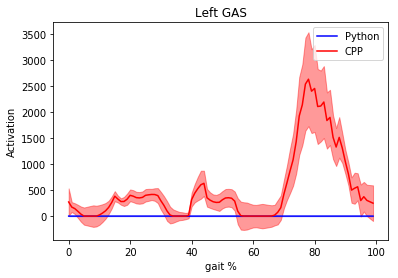

In [18]:
mean_exp,std_exp=get_mean_std_stride(df,'stim_med_gas_l',interp=True,stride_choice="repmax")
ax=plot_mean_std_fill(mean_exp,std_exp,'b')

mean_exp,std_exp=get_mean_std_stride(ol_df,'left_gas',interp=True,stride_choice="repmax")
plot_mean_std_fill(mean_exp,std_exp,'r',ax)
plt.title("Left GAS")
plt.xlabel("gait %")
plt.ylabel("Activation")
plt.legend(["Python","CPP"]);